In [1]:
# %pip install wget
# !python -m wget  https://www.gutenberg.org/cache/epub/2000/pg2000.txt

In [2]:

# importamos las librerías necesarias

import time
import pandas as pd
from pathlib import Path
import itertools
from textwrap import wrap

import decimal
# importamos el algoritmo de Chudnovsky de implementations/chudnovsky_altorendimiento.py
from implementations.chudnovsky_altorendimiento import pi_chudnovsky_bs





In [3]:
# importamos el archivo de texto del Quijote de la web de Gutenberg
# !python -m wget  https://www.gutenberg.org/cache/epub/2000/pg2000.txt

# definimos la ruta del archivo
recursos = Path.cwd() / "recursos"

quijote_file = recursos / 'primer_capitulo.txt'
quijote_file.exists()



True

In [4]:
# sea k el número de dígitos de precisión que se quieren calcular.
# este valor debe ser como máximo, el producto de n y el número total de caracteres del texto.

# por ejemplo, si n = 2, y el texto tiene 1000 caracteres, k = 2000.
# calcularemos el numero total de caracteres del texto

# abrimos el quijote como utf-8-sig, para evitar errores de codificación.    
with open(quijote_file, 'r', encoding='utf-8-sig') as file:
    # omitimos el copyright y los metadatos, para quedarnos solo con el texto íntegro de la obra.
    # leemos despues del caracter 27 hasta la línea -372.
    quijote_data = file.readlines()[36:-372]

# unimos todas las líneas en una sola cadena de texto.
quijote_data = ''.join(quijote_data)

# contamos los caracteres unicos del texto
caracteres = set(quijote_data)
# imprimimos los caracteres unicos
print(caracteres)
# imprimimos el número de caracteres unicos
print(len(caracteres))

# longitud en caracteres del texto
l = len(quijote_data)
print(l)

{'S', 'r', 'F', 'b', 'Q', 'P', 'D', 'H', 'Y', 'p', 'q', ':', 'x', 'I', 'U', 'ú', 'T', 'O', ';', ',', ' ', 'G', 'ó', 'l', 'ñ', 'n', 'a', 'u', 'c', 'A', 'R', '¿', 'á', 'e', 's', 'f', '?', "'", 'N', 'i', 'é', 'C', 'í', 'o', 'd', 'j', 'v', 't', '.', 'B', 'z', 'h', '¡', 'g', '!', 'L', 'M', 'm', 'E', '-', 'y', '\n', 'ü'}
63
10378


In [5]:
# longitud en caracteres de cada trozo de pi. como minimo dos, 
# ya que el alfabeto y todos los caracteres imprimibles pueden rondar los 100

# por tanto, n será como minimo, el valor del orden de magnitud superior de n.

print ("el texto contiene %s caractereres, su alfabeto tiene %s caracteres unicos" % (l, len(caracteres)))
print ("por tanto, el valor de n debe ser como minimo %s" % len(str(len(caracteres))))
n = len(str(len(caracteres)))

# de encontrar una solución con esta longitud, estaríamos muy cerca de la solución optima.
# si no se encuentra una solución, se incrementa el valor de n en 1 y se vuelve a intentar.
# si se encuentra una solución, se imprime el valor de n y el tiempo que ha tardado en encontrarla.

el texto contiene 10378 caractereres, su alfabeto tiene 63 caracteres unicos
por tanto, el valor de n debe ser como minimo 2


In [6]:
# tenemos ya por tanto, una estimación del numero de decimales de pi que necesitamos 
# para nuestra primera aproximación.

print ("decimales de pi necesarios = n * l = %s * %s = %s" % (n, l, n*l))

# por conveniencia, redondeamos el valor de n*l al siguiente valor dentro del orden de magnitud.
# para ello primero calculamos el log10 de n*l, y luego redondeamos hacia abajo.

# calculamos el log10 de n*l
log10 = decimal.Decimal(n*l).log10()
# redondeamos hacia abajo, quedandonos con el valor entero, para obtener el orden de magnitud.
exp = int(log10)

# calculamos el valor de k
k = int(n*l / 10**exp) + 1
k_r =(k * 10**exp)
print ("redondeado = %s" % k_r)




decimales de pi necesarios = n * l = 2 * 10378 = 20756
redondeado = 30000


In [7]:
# generamos esa misma cantidad de decimales de pi
# para ello, usamos el algoritmo de Chudnovsky, que hemos importado al principio del notebook.

pi = pi_chudnovsky_bs(k_r)

decimal.getcontext().prec = k_r
# imprimimos los decimales de pi, sin la parte entera
pi  = decimal.Decimal(pi) + 0






In [8]:
# mapeamos los decimales de pi en trozos de n-elementos
# itertools.zip_longest se encarga de los impares sueltos

start = time.time()
# 
b = map(''.join, itertools.zip_longest(*[iter(str(pi)[2:])]*n, fillvalue=''))
end = time.time()
print(end - start)

# imprimimos los trozos de pi
# print (list(b))

0.0


In [9]:
# tantos trozos de pi como caracteres totales en texto
nlist = list(b)[:l]
# print(nlist)


['14', '15', '92', '65', '35', '89', '79', '32', '38', '46', '26', '43', '38', '32', '79', '50', '28', '84', '19', '71', '69', '39', '93', '75', '10', '58', '20', '97', '49', '44', '59', '23', '07', '81', '64', '06', '28', '62', '08', '99', '86', '28', '03', '48', '25', '34', '21', '17', '06', '79', '82', '14', '80', '86', '51', '32', '82', '30', '66', '47', '09', '38', '44', '60', '95', '50', '58', '22', '31', '72', '53', '59', '40', '81', '28', '48', '11', '17', '45', '02', '84', '10', '27', '01', '93', '85', '21', '10', '55', '59', '64', '46', '22', '94', '89', '54', '93', '03', '81', '96', '44', '28', '81', '09', '75', '66', '59', '33', '44', '61', '28', '47', '56', '48', '23', '37', '86', '78', '31', '65', '27', '12', '01', '90', '91', '45', '64', '85', '66', '92', '34', '60', '34', '86', '10', '45', '43', '26', '64', '82', '13', '39', '36', '07', '26', '02', '49', '14', '12', '73', '72', '45', '87', '00', '66', '06', '31', '55', '88', '17', '48', '81', '52', '09', '20', '96', '28

In [10]:
# búsqueda: intenta crear un diccionario key:value en el que todo key sea único.
# si no lo consigue, sale del bucle.
# esta es una versión académica, pero se puede hacer más elegante.

res2 = {}
i=0
for key in nlist:
    if not key in res2:
        res2[key] = quijote_data[i]
    else:
        if res2[key] == quijote_data[i]:
            continue
        else:
            print ('not valid')
            break
    i = i+1

not valid


In [11]:
res2


{'14': '\n',
 '15': 'E',
 '92': 'n',
 '65': ' ',
 '35': 'u',
 '89': 'n',
 '79': ' ',
 '32': 'l',
 '38': 'u',
 '46': 'g',
 '26': 'a',
 '43': 'r'}

In [12]:
len(res2)

12

In [13]:
# todo junto hasta que lo encuentre:

def map_pi(n,l):
    pi = pi_chudnovsky_bs(n * l)

    decimal.getcontext().prec = n * l
    # imprimimos los decimales de pi, sin la parte entera
    pi  = decimal.Decimal(pi) + 0

    m = map(''.join, itertools.zip_longest(*[iter(str(pi)[2:])]*n, fillvalue=''))
    return list(m)[:l]

In [14]:
#loop
def busca_solucion(n, text):
    fin = False
    while not fin:
        print("para n= %s" % n)
        solucion = {}
        keys = map_pi(n,len(text))
        #timer
        start = time.time()
        #loop principal
        fin = True
        for i, key in enumerate(keys):
            if not key in solucion:
                solucion[key] = text[i]
            else:
                if solucion[key] == text[i]:
                    continue
                else:
                    print ('n= %s no es una solución válida' % n)
                    n = n+1
                    fin = False
                    end = time.time()
                    print( 'F tiempo: %s' % (end - start))
                    break
    end = time.time()
    print ('n= %s SI una solución válida' % n)
    print( 'OK tiempo: %s' % (end - start))
    return solucion

    

In [15]:
n=2 # valor inicial de n
solucion = busca_solucion(n, quijote_data)

if len(solucion) == len(quijote_data):
    print ("no es una solución óptima")

para n= 2
n= 2 no es una solución válida
F tiempo: 0.0
para n= 3
n= 3 no es una solución válida
F tiempo: 0.0
para n= 4
n= 4 no es una solución válida
F tiempo: 0.0
para n= 5
n= 5 no es una solución válida
F tiempo: 0.001001119613647461
para n= 6
n= 6 no es una solución válida
F tiempo: 0.0009989738464355469
para n= 7
n= 7 no es una solución válida
F tiempo: 0.0010004043579101562
para n= 8
n= 8 SI una solución válida
OK tiempo: 0.0020024776458740234
no es una solución óptima


In [18]:

# create a matrix with the solution, with the values of the dictionary
# and the keys of the dictionary, sorted by value

matrix = []
for key, value in solucion.items():
    matrix.append([key, value])

matrix.sort(key=lambda x: x[0])

# import matrix into a dataframe
import pandas as pd

df = pd.DataFrame(matrix, columns=['key', 'value'])
# group by value, and concatenate the keys into an array
df = df.groupby('value').agg(lambda x: list(x)).reset_index()
# count the number of keys in each array
df['count'] = df['key'].apply(lambda x: len(x))
# sort by count
df = df.sort_values(by='count', ascending=False)
df


,value,key,count
1,,"[00032296, 00103500, 00140511, 00207393, 00350...",1731
34,e,"[00106526, 00237187, 00447215, 00459741, 00475...",1067
30,a,"[00034728, 00129513, 00137277, 00207424, 00221...",1017
43,o,"[00042296, 00165069, 00225547, 00317031, 00347...",734
47,s,"[00006167, 00223929, 00341587, 00419759, 00583...",571
...,...,...,...
2,!,[08313667],1
9,?,[57543781],1
28,U,[86315030],1
22,O,[27312022],1


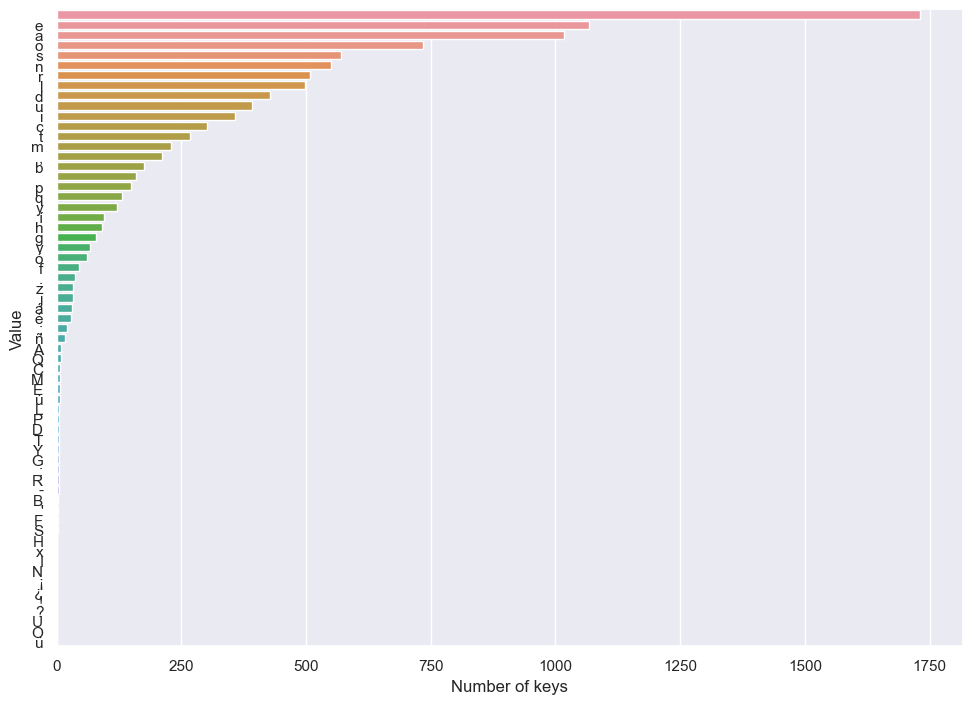

In [19]:
# plot the distribution of the number of keys in each array
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x="count", y="value", data=df)
ax.set(xlabel='Number of keys', ylabel='Value')
plt.show()
